In [1]:
from datetime import datetime, timezone, timedelta
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../sdpm_py_util')
import ocn_functions as ocnfuns
import plotting_functions as pltfuns
import atm_functions as atmfuns
from util_functions import s_coordinate_4



/home/mspydell/models/PFM_root/PFM/driver/../sdpm_py_util/ocn_functions.py:25: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater


In [4]:
import datetime
#datetime.datetime.now(datetime.timezone.utc).astimezone().tzinfo
xxx = datetime.datetime.now().astimezone().tzinfo
print(xxx)
xxx?


PDT


Type:        timezone
String form: PDT
File:        ~/anaconda3/lib/python3.12/datetime.py
Docstring:   Fixed offset from UTC implementation of tzinfo.

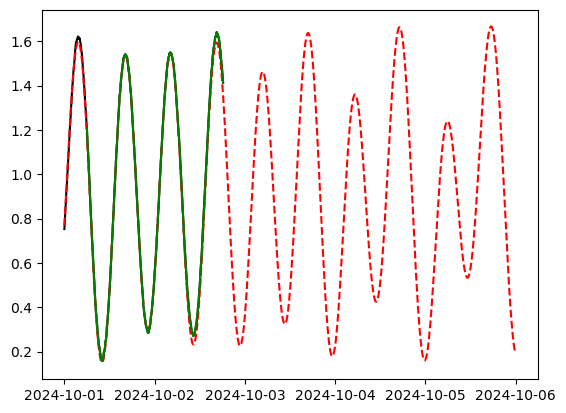

In [2]:

meta = {
    'start': '20241001',
    'end': '20241005',
    'datum': 'MSL',
    'location': '9410230',
    'time_zone': 'GMT',
    'format': 'json',
}

ssh1,t1,ssh2,t2 = pltfuns.get_tide_levels(meta)

tbeg = datetime(2024,10,1,6,0,0)
tend = tbeg + 2.5 * timedelta(days=1)

msk = (t1 >= tbeg) & (t1 <= tend)
t3 = t1[msk]
ssh3 = ssh1[msk]

fig, ax = plt.subplots()
p1=ax.plot(t1[:],ssh1[:],'k')
p2=ax.plot(t2[:],ssh2[:],'--r')
p3=ax.plot(t3,ssh3,'g')



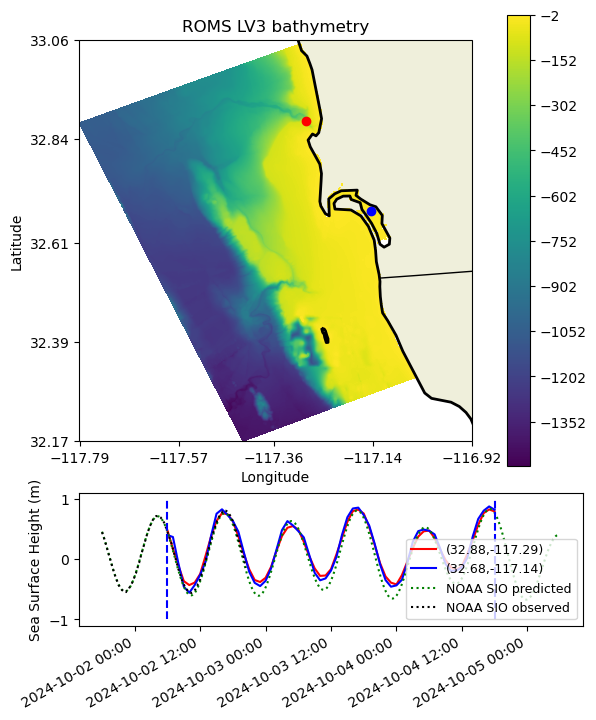

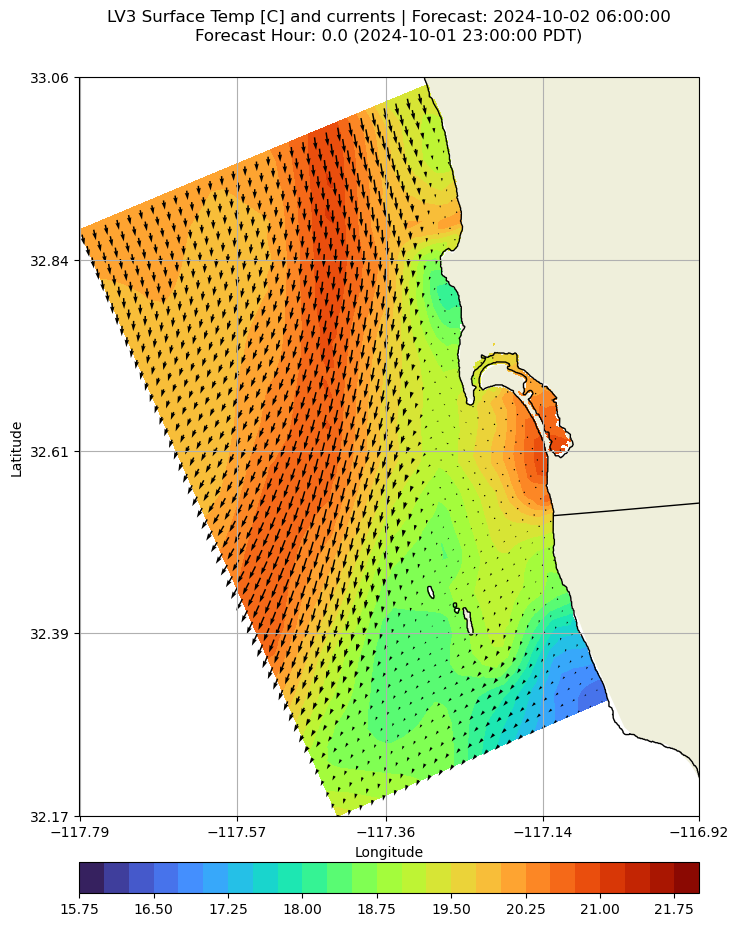

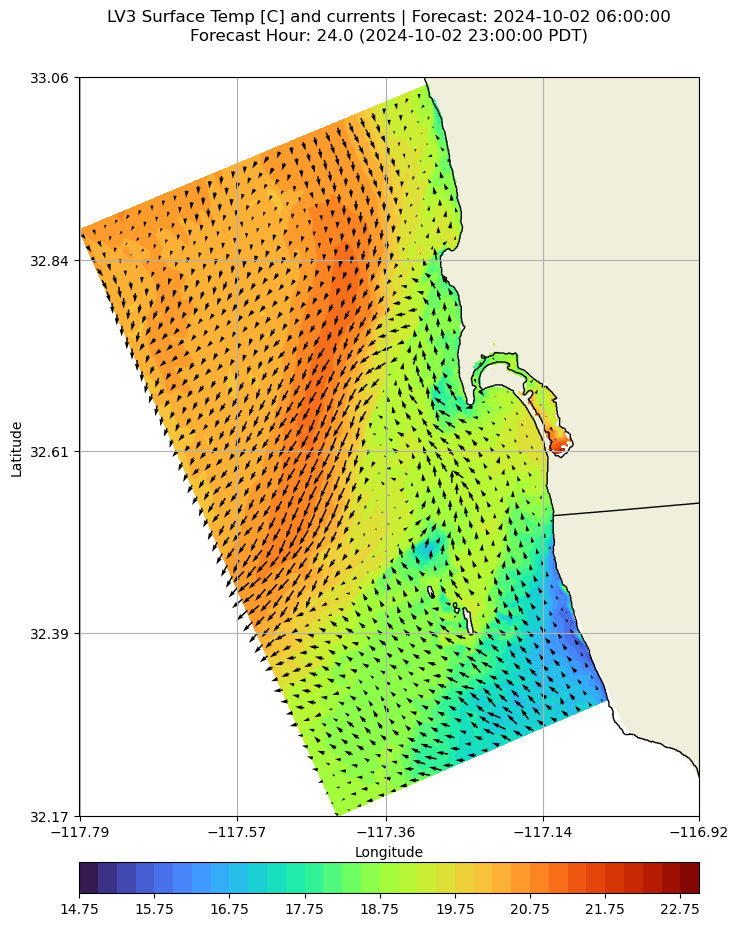

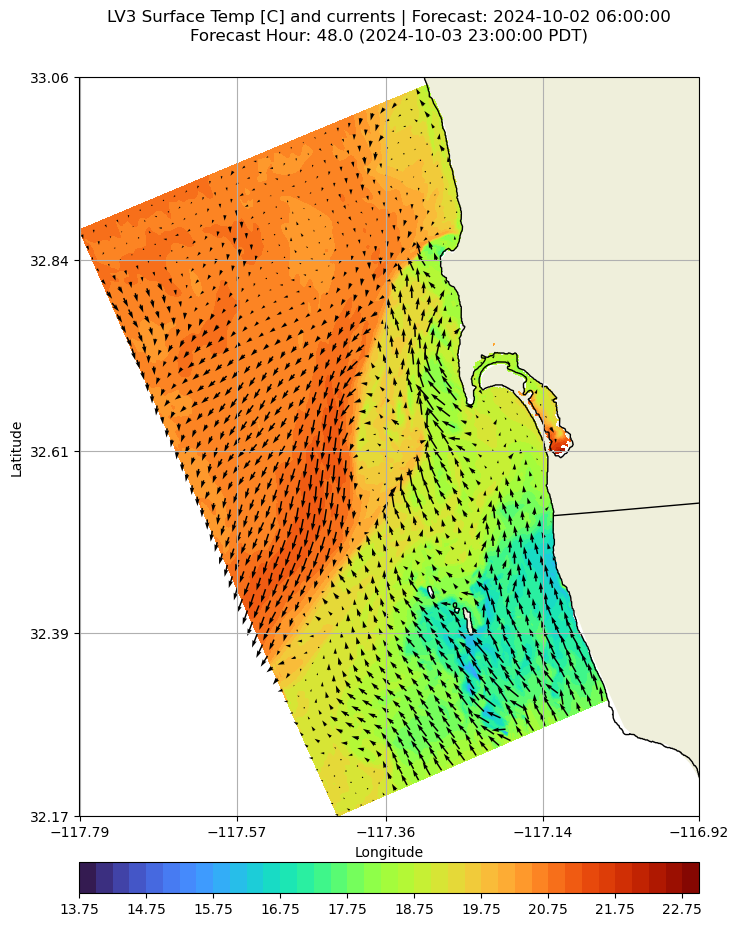

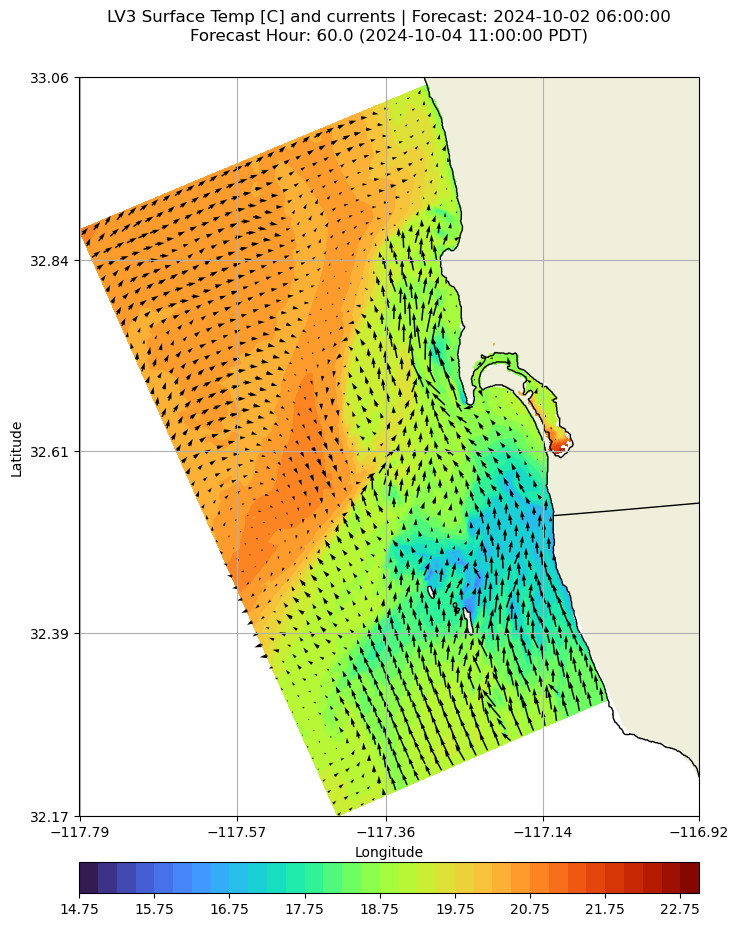

In [2]:
lvl='LV3'
pltfuns.make_all_his_figures(lvl)

In [ ]:


lvl='3'
ocnfuns.mk_LV2_BC_dict(lvl)



In [3]:

fn_in = '/scratch/PFM_Simulations/LV3_Forecast/Forc/test_BC_LV3.pkl'
fn_out = '/scratch/PFM_Simulations/LV3_Forecast/Forc/test_BC_LV3.nc'

ocnfuns.ocn_roms_BC_dict_to_netcdf_pckl(fn_in,fn_out)



OCN_BC dict loaded with pickle

max and min of data in ROMS BC file (iz is bottom [0] to top [39]):
max zeta_north =  0.701 m          at  ( it, ilon)     =  ( 55, 218)
min zeta_north = -0.419 m          at  ( it, ilon)     =  ( 48, 152)
max zeta_south =  0.753 m          at  ( it, ilon)     =  ( 54, 250)
min zeta_south = -0.407 m          at  ( it, ilon)     =  ( 24, 182)
max zeta_west  =  0.721 m          at  ( it, ilat)     =  ( 54,  26)
min zeta_west  = -0.394 m          at  ( it, ilat)     =  ( 48, 377)
max ubar_north =  0.067 m/s        at  ( it, ilon)     =  ( 48, 248)
min ubar_north = -0.059 m/s        at  ( it, ilon)     =  ( 42, 216)
max ubar_south =  0.081 m/s        at  ( it, ilon)     =  ( 11, 102)
min ubar_south = -0.136 m/s        at  ( it, ilon)     =  ( 54, 135)
max ubar_west  =  0.059 m/s        at  ( it, ilat)     =  ( 17, 320)
min ubar_west  = -0.064 m/s        at  ( it, ilat)     =  ( 23, 146)
max vbar_north =  0.405 m/s        at  ( it, ilon)     =  ( 46, 236)
min

In [ ]:

lvl='3'
ocnfuns.mk_LV2_IC_dict(lvl)

fn_in = '/scratch/PFM_Simulations/LV3_Forecast/Forc/test_IC_LV3.pkl'
fn_out = '/scratch/PFM_Simulations/LV3_Forecast/Forc/test_IC_LV3.nc'

ocnfuns.ocn_roms_IC_dict_to_netcdf_pckl(fn_in,fn_out)



In [ ]:

lvl='2'
ocnfuns.mk_LV2_IC_dict(lvl)

fn_in = '/scratch/PFM_Simulations/LV2_Forecast/Forc/test_IC_LV2.pkl'
fn_out = '/scratch/PFM_Simulations/LV2_Forecast/Forc/test_IC_LV2.nc'

ocnfuns.ocn_roms_IC_dict_to_netcdf_pckl(fn_in,fn_out)

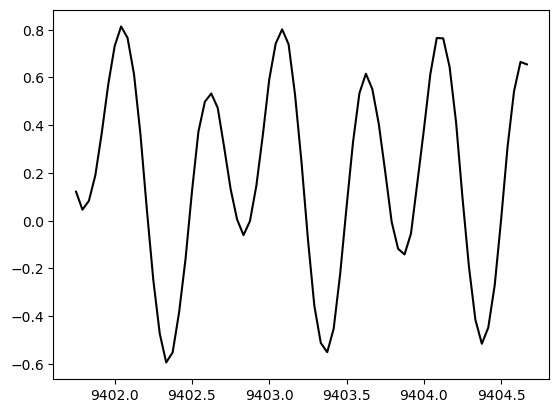

In [3]:

bclv1 = netCDF4.Dataset('/scratch/PFM_Simulations/LV1_Forecast/Forc/LV1_OCEAN_BC.nc')

varnm='zeta_south'
eta = bclv1.variables[varnm][:]
t   = bclv1.variables['zeta_time'][:]
fig, ax = plt.subplots()
p1=ax.plot(t[:],eta[:,0],'k')


In [2]:
OCN_R = ocnfuns.load_ocnR_from_pckl_files()
zeta = OCN_R['zeta']
print(np.shape(zeta))
print(zeta[:,0,0])

(71, 390, 253)
[ 0.12177312  0.04649817  0.08335876  0.19062359  0.36849671  0.5703765
  0.73153743  0.81365531  0.76594552  0.61393926  0.36289615  0.04618638
 -0.24852339 -0.47279209 -0.5936197  -0.55146263 -0.38431178 -0.1606326
  0.1225096   0.37275675  0.49830942  0.53291772  0.47261218  0.30761842
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


: 

In [ ]:



bclv2 = netCDF4.Dataset('/scratch/PFM_Simulations/LV2_Forecast/Forc/LV2_OCEAN_BC.nc')
bclv3 = netCDF4.Dataset('/scratch/PFM_Simulations/LV3_Forecast/Forc/LV3_OCEAN_BC.nc')
#bclv3_v2 = netCDF4.Dataset('/scratch/PFM_Simulations/LV3_Forecast/Forc/test_BC_LV3.nc')

iclv3 = netCDF4.Dataset('/scratch/PFM_Simulations/LV3_Forecast/Forc/LV3_OCEAN_IC.nc')
iclv2 = netCDF4.Dataset('/scratch/PFM_Simulations/LV2_Forecast/Forc/LV2_OCEAN_IC.nc')
iclv1 = netCDF4.Dataset('/scratch/PFM_Simulations/LV1_Forecast/Forc/LV1_OCEAN_IC.nc')

atm3 = netCDF4.Dataset('/scratch/PFM_Simulations/LV3_Forecast/Forc/LV3_ATM_FORCING.nc')
atm2 = netCDF4.Dataset('/scratch/PFM_Simulations/LV2_Forecast/Forc/LV2_ATM_FORCING.nc')
atm1 = netCDF4.Dataset('/scratch/PFM_Simulations/LV1_Forecast/Forc/LV1_ATM_FORCING.nc')

#iclv2_v2 = netCDF4.Dataset('/scratch/PFM_Simulations/LV2_Forecast/Forc/test_IC_LV2.nc')
#iclv3_v2 = netCDF4.Dataset('/scratch/PFM_Simulations/LV3_Forecast/Forc/test_IC_LV3.nc')

bclv1 = netCDF4.Dataset('/scratch/PFM_Simulations/LV1_Forecast/Forc/LV1_OCEAN_BC.nc')
ic1 = netCDF4.Dataset('/scratch/PFM_Simulations/LV1_Forecast/Forc/LV1_OCEAN_IC.nc')
#f = netCDF4.Dataset('/scratch/PFM_Simulations/LV1_Forecast/Forc/LV1_ATM_FORCING.nc')


ic2 = netCDF4.Dataset('/scratch/matt/sdtjre_L1/ocean_rst_LV1_20172018_01.nc')
bc2 = netCDF4.Dataset('/scratch/matt/sdtjre_L1/BC_LV1_20181201_20200930_smooth.nc')

grd1 = netCDF4.Dataset('/scratch/PFM_Simulations/Grids/GRID_SDTJRE_LV1_rx020_hmask.nc')
grd2 = netCDF4.Dataset('/scratch/PFM_Simulations/Grids/GRID_SDTJRE_LV2_rx020.nc')
grd3 = netCDF4.Dataset('/scratch/PFM_Simulations/Grids/GRID_SDTJRE_LV3_rx020.nc')

#his = netCDF4.Dataset('/scratch/PFM_Simulations/LV3_Forecast/His/LV3_ocean_his_202409081200.nc')



Text(0.5, 1.0, 'LV1 mask_rho')

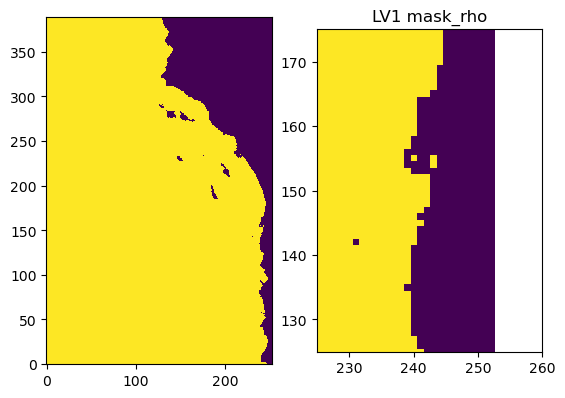

In [14]:
varnm='mask_rho'
vv=grd1.variables[varnm][:]
fig, ax = plt.subplots(1,2)

p0=ax[0].imshow(vv, interpolation='none',origin='lower')

p0=ax[1].imshow(vv, interpolation='none',origin='lower')

ax[1].set_xlim([225,260])
ax[1].set_ylim([125,175])
ax[1].set_title('LV1 mask_rho')


Text(0.5, 1.0, 'LV2 mask_rho')

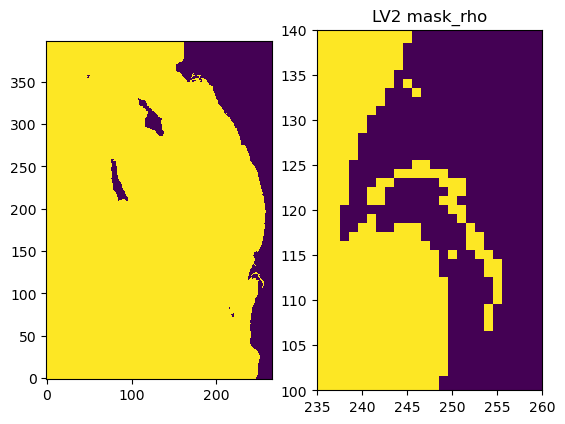

In [37]:
varnm='mask_rho'
vv=grd2.variables[varnm][:]
fig, ax = plt.subplots(1,2)

p0=ax[0].imshow(vv, interpolation='none',origin='lower')

p0=ax[1].imshow(vv, interpolation='none',origin='lower')

ax[1].set_xlim([235,260])
ax[1].set_ylim([100,140])
ax[1].set_title('LV2 mask_rho')


Text(0.5, 1.0, 'LV3 mask_rho')

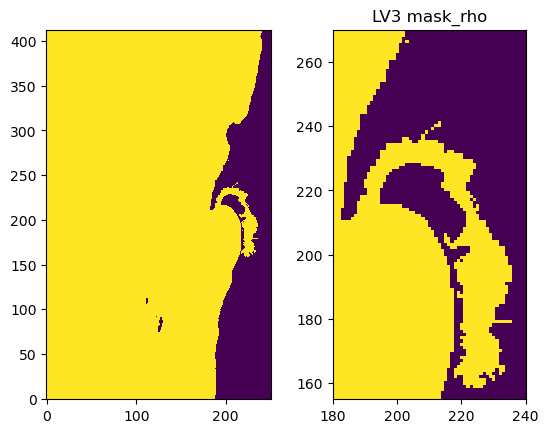

In [34]:
varnm='mask_rho'
vv=grd3.variables[varnm][:]
fig, ax = plt.subplots(1,2)

p0=ax[0].imshow(vv, interpolation='none',origin='lower')

p0=ax[1].imshow(vv, interpolation='none',origin='lower')

ax[1].set_xlim([180,240])
ax[1].set_ylim([155,270])
ax[1].set_title('LV3 mask_rho')


In [ ]:

print(iclv3.variables['ocean_time'][:])
print(bclv3.variables['ocean_time'][:])
print(atm3.variables['ocean_time'][:])
print(iclv2.variables['ocean_time'][:])
print(bclv2.variables['ocean_time'][:])
print(atm2.variables['ocean_time'][:])
print(iclv1.variables['ocean_time'][:])
print(bclv1.variables['ocean_time'][:])
print(atm1.variables['ocean_time'][:])



t0 = datetime(1999,1,1)
tatm = t0 + timedelta(days=9377.5)
print(tatm)

print(np.shape(iclv3.variables['temp'][:]))

In [5]:
hraw = None
hb = 50.0
th_b = 3.0
th_s = 8.0
Tcl = 50.0
Nz = 40
zrom1 = s_coordinate_4(grd1.variables['h'][:], th_b , th_s , Tcl , Nz, hraw=hraw, zeta=iclv1.variables['zeta'][0,:,:])
zrom2 = s_coordinate_4(grd2.variables['h'][:], th_b , th_s , Tcl , Nz, hraw=hraw, zeta=iclv2.variables['zeta'][0,:,:])
zrom3 = s_coordinate_4(grd3.variables['h'][:], th_b , th_s , Tcl , Nz, hraw=hraw, zeta=iclv3.variables['zeta'][0,:,:])
#zrom1bcn = s_coordinate_4(np.tile( grd1.variables['h'][-1,:], (21,1)), th_b , th_s , Tcl , Nz, hraw=hraw, zeta=bclv1.variables['zeta_north'][:,:])
#zrom1bcn = s_coordinate_4(grd1.variables['h'][-1,:], th_b , th_s , Tcl , Nz, hraw=hraw, zeta=bclv1.variables['zeta_north'][:,:])

z1 = zrom1.z_r[:,:,:]
z2 = zrom2.z_r[:,:,:]
z3 = zrom3.z_r[:,:,:]  

#zrom1_n = s_coordinate_4(grd1.variables['h'][-1,:], th_b , th_s , Tcl , Nz, hraw=hraw, zeta=iclv1.variables['zeta'][0,-1,:])

In [6]:
OCN_R = ocnfuns.load_ocnR_from_pckl_files()
print(OCN_R.keys())


dict_keys(['depth', 'lat_rho', 'lon_rho', 'lat_u', 'lon_u', 'lat_v', 'lon_v', 'ocean_time', 'ocean_time_ref', 'salt', 'temp', 'ubar', 'urm', 'vbar', 'vrm', 'zeta', 'vinfo'])


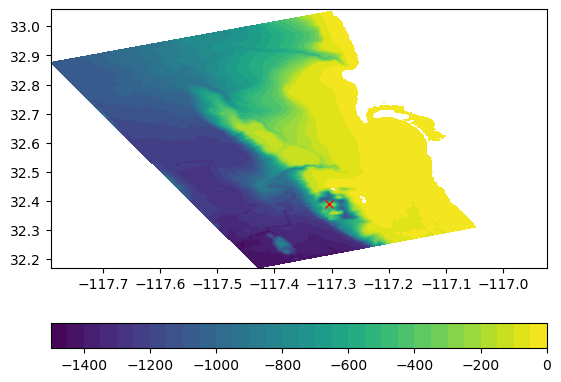

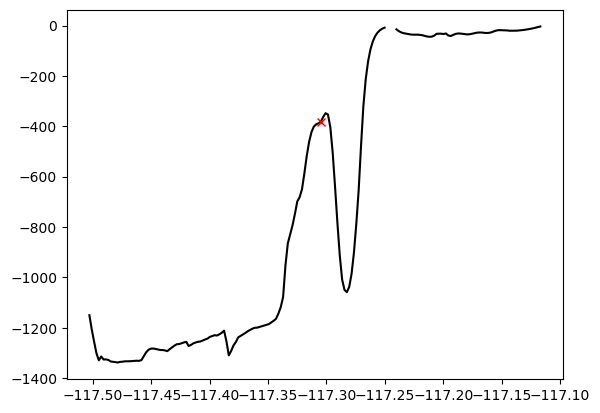

In [7]:
# this is the bad region in lv3
ix3 = 98
iy3 = 85
xx = grd3.variables['lon_rho'][:]
yy = grd3.variables['lat_rho'][:]
zz = -grd3.variables['h'][:]
msk = grd3.variables['mask_rho'][:]
zz[msk==0] = np.nan

fig, ax = plt.subplots()
p0=ax.contourf(xx,yy,zz,30)
p1=ax.plot(xx[iy3,ix3],yy[iy3,ix3],'rx')
fig.colorbar(p0, ax=ax,location='bottom')

fig, ax = plt.subplots()
p1=ax.plot(xx[iy3,:],zz[iy3,:],'k')
p2=ax.plot(xx[iy3,ix3],zz[iy3,ix3],'rx')


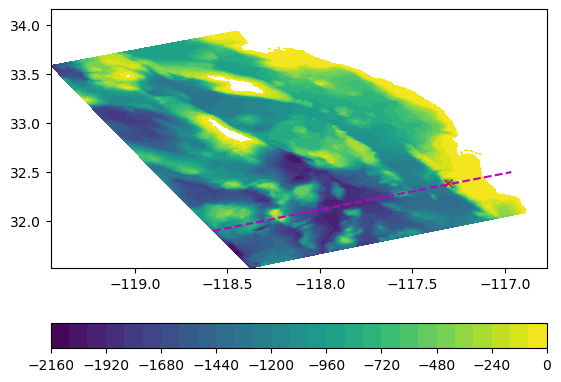

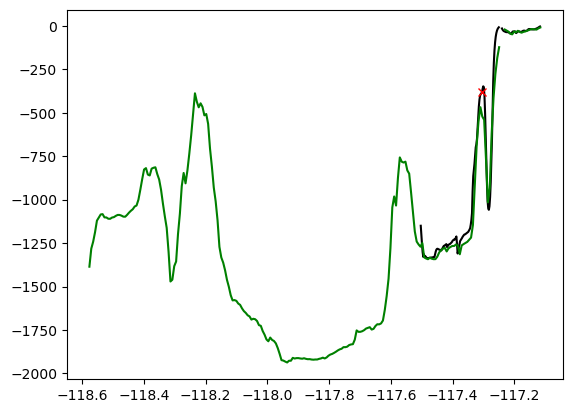

In [8]:

# LV2 map with bad LV3 spot
xx2 = grd2.variables['lon_rho'][:]
yy2 = grd2.variables['lat_rho'][:]
zz2 = -grd2.variables['h'][:]
msk2 = grd2.variables['mask_rho'][:]
zz2[msk2==0] = np.nan

fig, ax = plt.subplots()
p0=ax.contourf(xx2,yy2,zz2,30)
p1=ax.plot(xx[iy3,ix3],yy[iy3,ix3],'rx')
iy2 = 73
p2=ax.plot(xx2[iy2,:],yy2[iy2,:],'--m')
fig.colorbar(p0, ax=ax,location='bottom')

fig, ax = plt.subplots()
p1=ax.plot(xx[iy3,:],zz[iy3,:],'k')
p3=ax.plot(xx2[iy2,:],zz2[iy2,:],'g')
p2=ax.plot(xx[iy3,ix3],zz[iy3,ix3],'rx')


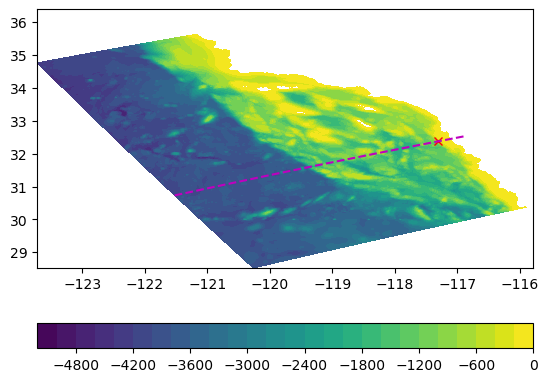

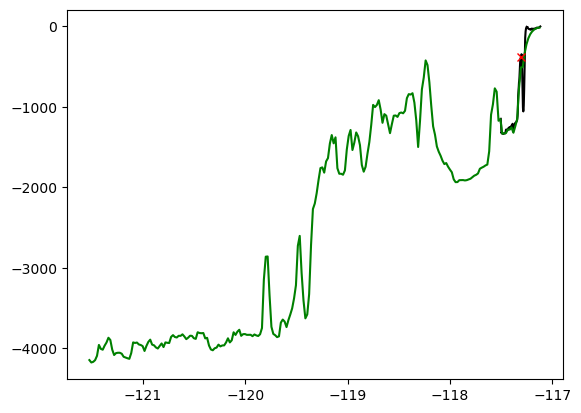

In [9]:
# LV1 map with bad LV3 spot
xx2 = grd1.variables['lon_rho'][:]
yy2 = grd1.variables['lat_rho'][:]
zz2 = -grd1.variables['h'][:]
msk2 = grd1.variables['mask_rho'][:]
zz2[msk2==0] = np.nan

fig, ax = plt.subplots()
p0=ax.contourf(xx2,yy2,zz2,30)
p1=ax.plot(xx[iy3,ix3],yy[iy3,ix3],'rx')
iy1 = 139
p2=ax.plot(xx2[iy1,:],yy2[iy1,:],'--m')
fig.colorbar(p0, ax=ax,location='bottom')

fig, ax = plt.subplots()
p1=ax.plot(xx[iy3,:],zz[iy3,:],'k')
p3=ax.plot(xx2[iy1,:],zz2[iy1,:],'g')
p2=ax.plot(xx[iy3,ix3],zz[iy3,ix3],'rx')



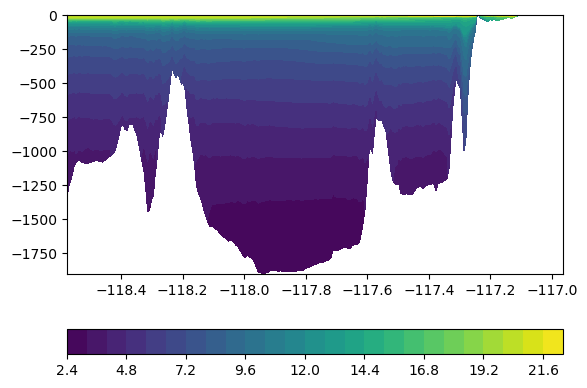

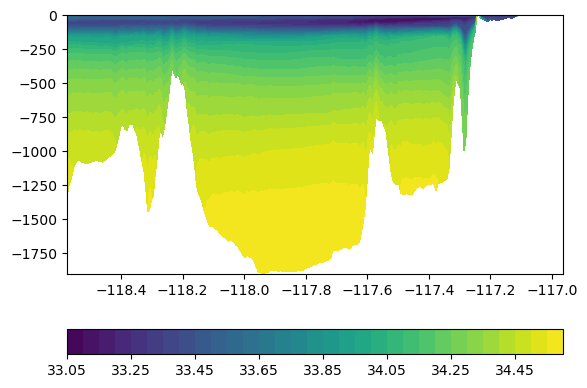

In [10]:

# previous IC.nc file. With weirdness near ridges and valleys
xx2 = np.tile( grd2.variables['lon_rho'][iy2,:],[40,1] )
yy2 = grd2.variables['lat_rho'][:]
zz2 = z2
vv2 = iclv2.variables['temp'][0,:,:,:]
msk2 = grd2.variables['mask_rho'][:]

fig, ax = plt.subplots()
p0=ax.contourf(xx2,zz2[:,iy2,:],vv2[:,iy2,:],30)
fig.colorbar(p0, ax=ax,location='bottom')


vv2 = iclv2.variables['salt'][0,:,:,:]
fig, ax = plt.subplots()
p0=ax.contourf(xx2,zz2[:,iy2,:],vv2[:,iy2,:],30)
fig.colorbar(p0, ax=ax,location='bottom')




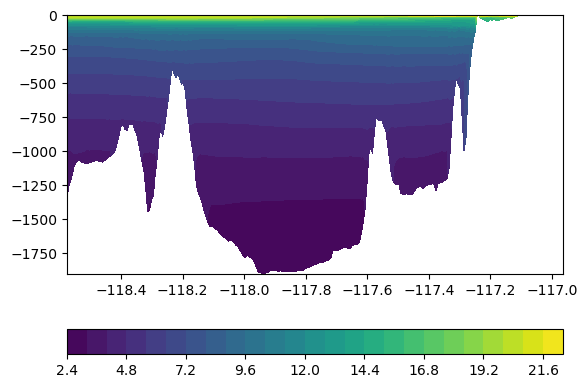

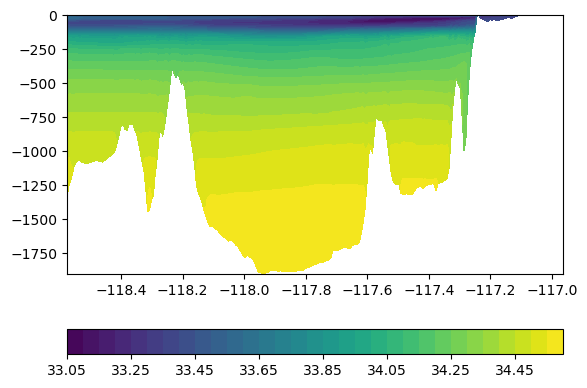

In [11]:

# new IC.nc file. no weirdness
xx2 = np.tile( grd2.variables['lon_rho'][iy2,:],[40,1] )
yy2 = grd2.variables['lat_rho'][:]
zz2 = z2
vv2 = iclv2_v2.variables['temp'][0,:,:,:]
msk2 = grd2.variables['mask_rho'][:]

fig, ax = plt.subplots()
p0=ax.contourf(xx2,zz2[:,iy2,:],vv2[:,iy2,:],30)
fig.colorbar(p0, ax=ax,location='bottom')


vv2 = iclv2_v2.variables['salt'][0,:,:,:]
fig, ax = plt.subplots()
p0=ax.contourf(xx2,zz2[:,iy2,:],vv2[:,iy2,:],30)
fig.colorbar(p0, ax=ax,location='bottom')




(-100.0, 5.0)

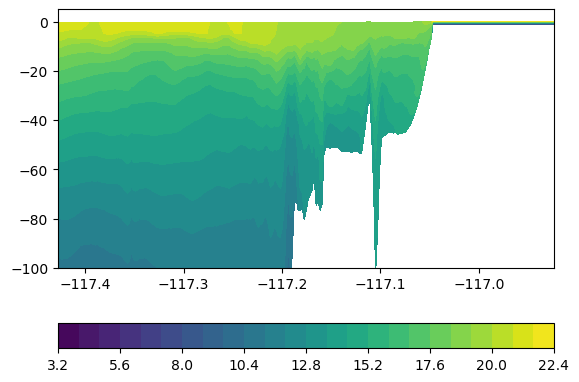

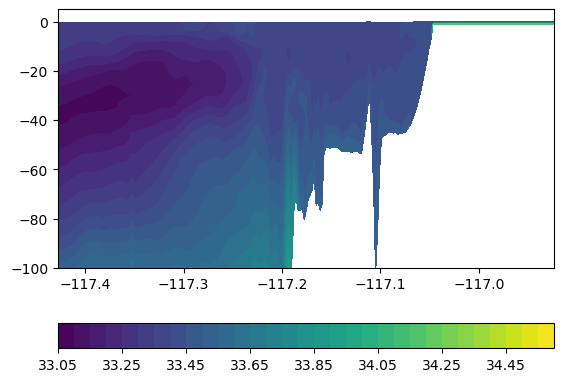

In [18]:

# old BC.nc file. weirdness
xx2 = np.tile( grd3.variables['lon_rho'][0,:],[40,1] )
zz2 = z3
vv2 = bclv3.variables['temp_south'][-1,:,:]

fig, ax = plt.subplots()
p0=ax.contourf(xx2,zz2[:,0,:],vv2[:,:],30)
fig.colorbar(p0, ax=ax,location='bottom')
ax.set_ylim([-100,5])


vv2 = bclv3.variables['salt_south'][-1,:,:]
fig, ax = plt.subplots()
p0=ax.contourf(xx2,zz2[:,0,:],vv2[:,:],30)
fig.colorbar(p0, ax=ax,location='bottom')
ax.set_ylim([-100,5])



(-100.0, 5.0)

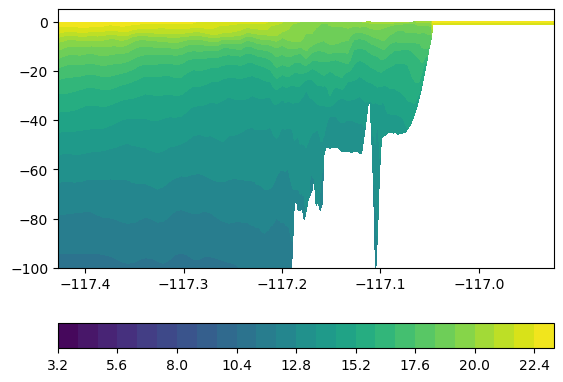

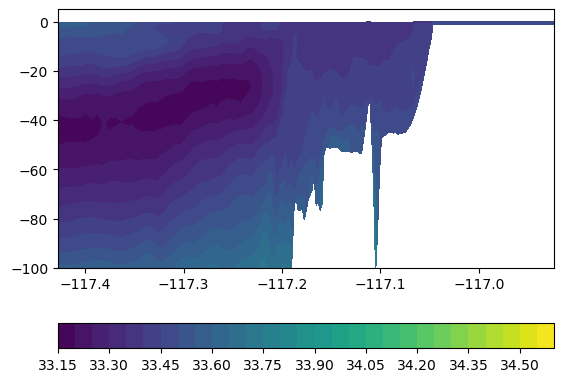

In [19]:


# new BC.nc file. no weirdness
xx2 = np.tile( grd3.variables['lon_rho'][0,:],[40,1] )
zz2 = z3
vv2 = bclv3_v2.variables['temp_south'][-1,:,:]

fig, ax = plt.subplots()
p0=ax.contourf(xx2,zz2[:,0,:],vv2[:,:],30)
fig.colorbar(p0, ax=ax,location='bottom')
ax.set_ylim([-100,5])


vv2 = bclv3_v2.variables['salt_south'][-1,:,:]
fig, ax = plt.subplots()
p0=ax.contourf(xx2,zz2[:,0,:],vv2[:,:],30)
fig.colorbar(p0, ax=ax,location='bottom')
ax.set_ylim([-100,5])




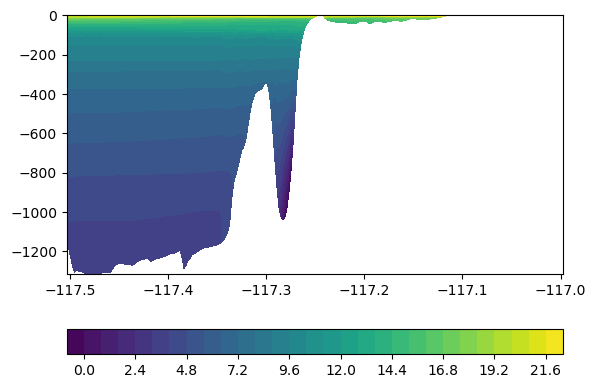

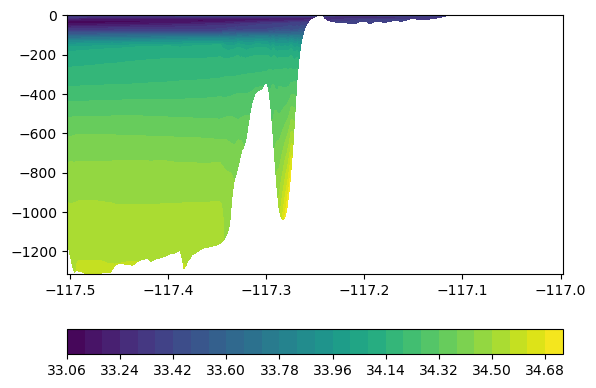

In [12]:
xx2 = np.tile( grd3.variables['lon_rho'][iy3,:],[40,1] )
yy2 = grd3.variables['lat_rho'][:]
zz2 = z3
vv2 = iclv3_v2.variables['temp'][0,:,:,:]
msk2 = grd3.variables['mask_rho'][:]

fig, ax = plt.subplots()
p0=ax.contourf(xx2,zz2[:,iy3,:],vv2[:,iy3,:],30)
fig.colorbar(p0, ax=ax,location='bottom')

vv2 = iclv3_v2.variables['salt'][0,:,:,:]
fig, ax = plt.subplots()
p0=ax.contourf(xx2,zz2[:,iy3,:],vv2[:,iy3,:],30)
fig.colorbar(p0, ax=ax,location='bottom')


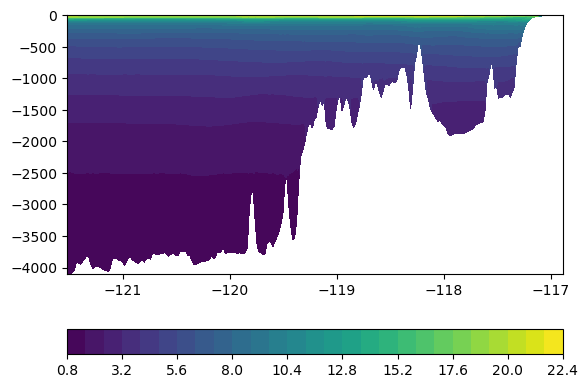

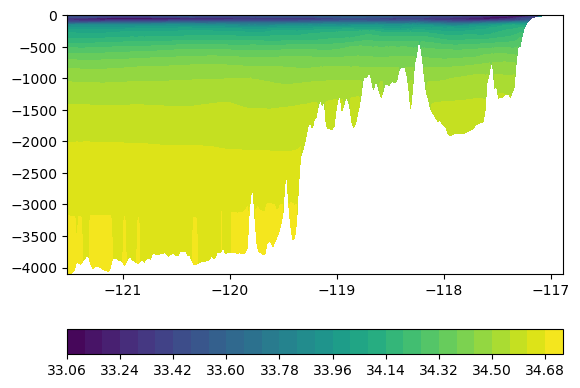

In [76]:
iy2 = 139
xx2 = np.tile( grd1.variables['lon_rho'][iy2,:],[40,1] )
yy2 = grd1.variables['lat_rho'][:]
zz2 = z1
vv2 = iclv1.variables['temp'][0,:,:,:]
msk2 = grd1.variables['mask_rho'][:]

fig, ax = plt.subplots()
p0=ax.contourf(xx2,zz2[:,iy2,:],vv2[:,iy2,:],30)
fig.colorbar(p0, ax=ax,location='bottom')


vv2 = iclv1.variables['salt'][0,:,:,:]
fig, ax = plt.subplots()
p0=ax.contourf(xx2,zz2[:,iy2,:],vv2[:,iy2,:],30)
fig.colorbar(p0, ax=ax,location='bottom')


In [ ]:

varnm='temp_south'
vv=bc1.variables[varnm][:]
print(np.shape(vv))
fig, ax = plt.subplots()
xx = np.tile( OCN_R['lon_rho'][0,:],[40,1] )
#print(xx)
#print(np.shape(xx))
yy = np.squeeze(Zrm['zr_bc_s'][0,:,:])
#print(yy)
#print(np.shape(yy))
zz = np.squeeze(np.squeeze(vv[0,:,:]))
#print(np.shape(zz))
#p0=ax.imshow(zz)
p0=ax.contourf(xx,yy,zz,plevs)
p1=ax.plot([-116.1,-115.85],[0,0],'--k')
p2=ax.plot(OCN_R['lon_rho'][0,:],1*msk[0,:],'ro')
p3=ax.plot(OCN_R['lon_rho'][0,:],OCN_R['zeta'][0,0,:],'b')
p3=ax.plot(OCN_R['lon_rho'][0,:],-0.01*hb[0,:],'c')


fig.colorbar(p0, ax=ax,location='bottom')
#ax.set_xlim([-116.1, -115.8])
#ax.set_ylim([-1,1])


(21, 40, 253)


(0.0, 250.0)

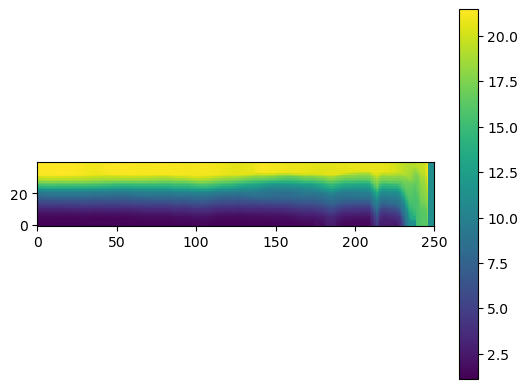

In [15]:
varnm='temp_south'
vv=bc1.variables[varnm][:]
print(np.shape(vv))
fig, ax = plt.subplots()
p0=ax.imshow(vv[0,:,:], interpolation='none',origin='lower')
fig.colorbar(p0, ax=ax,location='right')
ax.set_xlim([0, 250])


(21, 40, 253)


(30.0, 40.0)

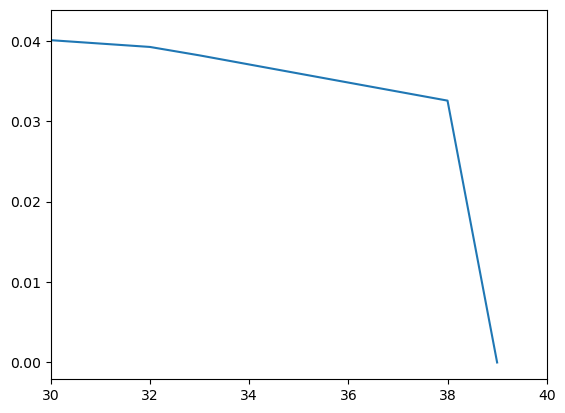

In [78]:
varnm='v_south'
vv=bc1.variables[varnm][:]
print(np.shape(vv))
fig, ax = plt.subplots()
p0=ax.plot(vv[0,:,245])
ax.set_xlim([30, 40])


In [ ]:


varnm='temp'
vv=his.variables[varnm][:]
print(np.shape(vv))
fig, ax = plt.subplots()
p0=ax.imshow(vv[0,39,:,:], interpolation='none',origin='lower')
p1=ax.plot(41,106,'rx')
fig.colorbar(p0, ax=ax,location='bottom')
ax.set_xlim([200, 250])
ylm = [0,50] 
ax.set_ylim(ylm)


(1, 40, 413, 251)


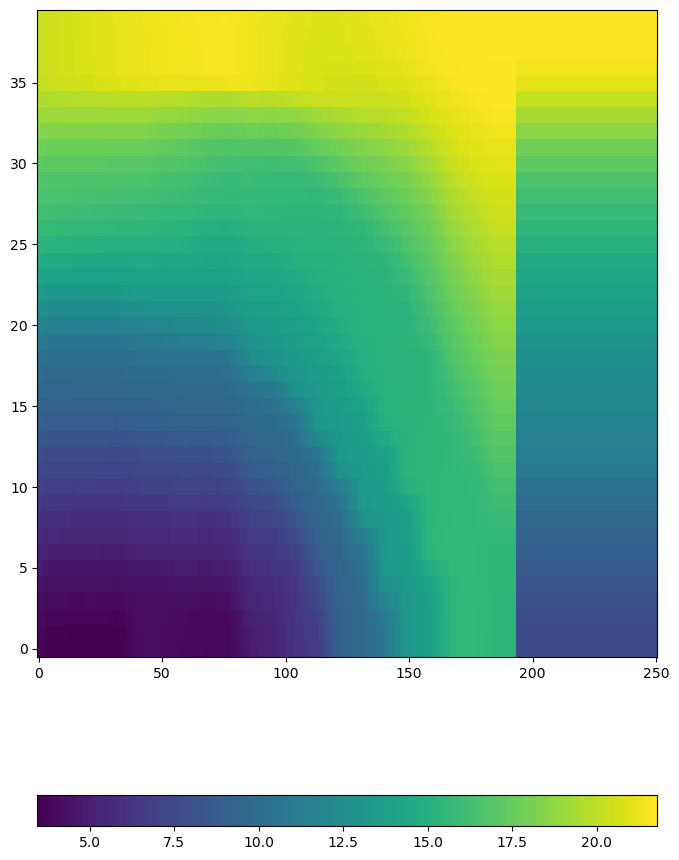

In [38]:
iy=97
varnm='temp'
vv=iclv3.variables[varnm][:]
print(np.shape(vv))
fig, ax = plt.subplots(figsize=(8, 12))
vv2 = np.squeeze(vv[0,:,iy,:])
p0=ax.imshow(vv2, interpolation='none',origin='lower')
fig.colorbar(p0, ax=ax,location='bottom')
#ax.set_xlim([0, 250])
ax.set_aspect('auto', adjustable='box')

#print(vv2[39,:])

(1, 413, 251)


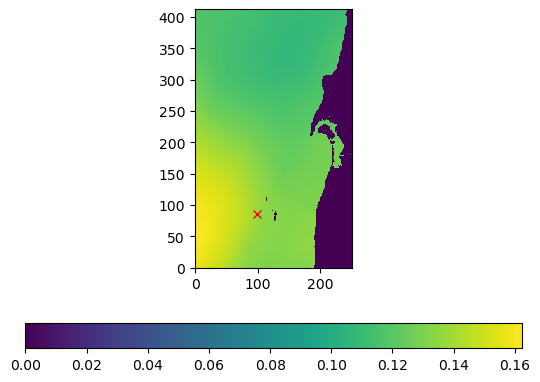

In [34]:
varnm='zeta'
vv=his.variables[varnm][:]
print(np.shape(vv))
fig, ax = plt.subplots()
p0=ax.imshow(vv[0,:,:], interpolation='none',origin='lower')
p1=ax.plot(98,85,'rx')
fig.colorbar(p0, ax=ax,location='bottom')
#ax.set_xlim([200, 250])
#ylm = [0,50] 
#ax.set_ylim(ylm)
#p0.set_clim(.06,.175)

(390, 253)


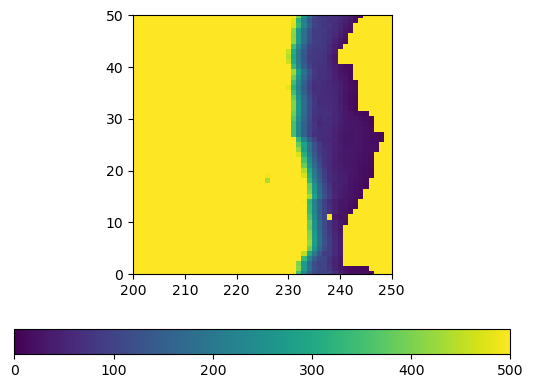

In [68]:

varnm='mask_rho'
vmsk = grd.variables[varnm][:]
varnm='h'
vv = grd.variables[varnm][:]
print(np.shape(vv))
fig, ax = plt.subplots()
vv[vmsk==0]=1000
p0=ax.imshow(vv[:,:], interpolation='none',origin='lower')
fig.colorbar(p0, ax=ax,location='bottom')
ax.set_xlim([200, 250])
ylm = [0,50] 
ax.set_ylim(ylm)
p0.set_clim(0,500)

(21, 253)


(-0.1, 1.0)

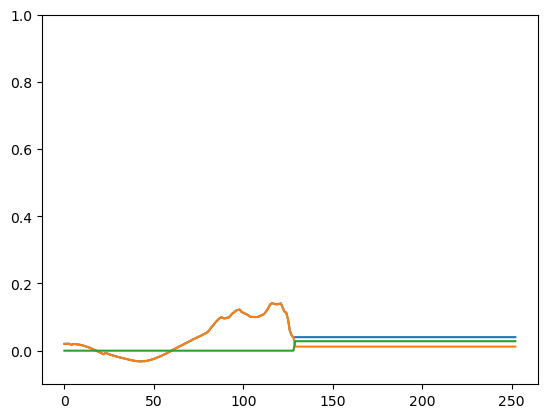

In [4]:
vv = bc1.variables['vbar_north'][:]
v2 = ic1.variables['vbar'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,:])
p1=ax.plot(v2[0,-1,:])
p3=ax.plot(vv[0,:]-v2[0,-1,:])
ax.set_ylim([-.1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 253)


(-0.1, 1.0)

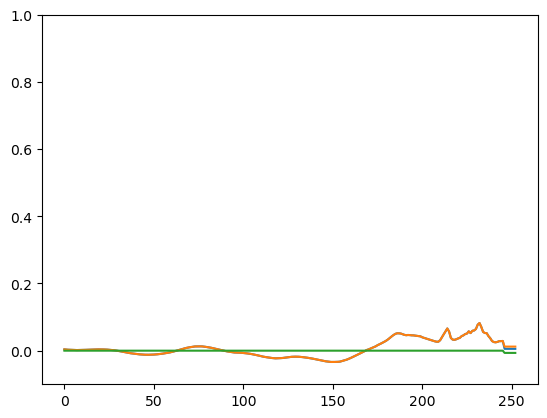

In [5]:
vv = bc1.variables['vbar_south'][:]
v2 = ic1.variables['vbar'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,:])
p1=ax.plot(v2[0,0,:])
p3=ax.plot(vv[0,:]-v2[0,0,:])
ax.set_ylim([-.1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 389)


(-0.1, 1.0)

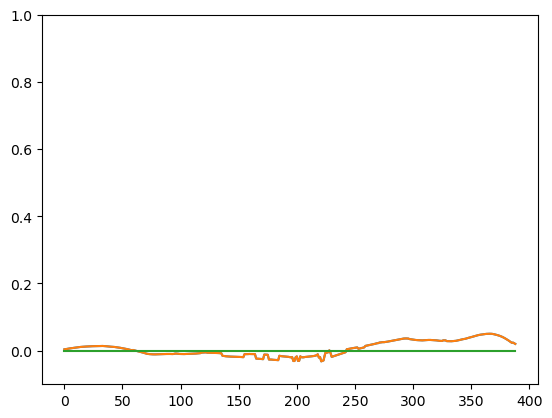

In [6]:
vv = bc1.variables['vbar_west'][:]
v2 = ic1.variables['vbar'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,:])
p1=ax.plot(v2[0,:,0])
p3=ax.plot(vv[0,:]-v2[0,:,0])
ax.set_ylim([-.1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 253)


(-0.1, 1.0)

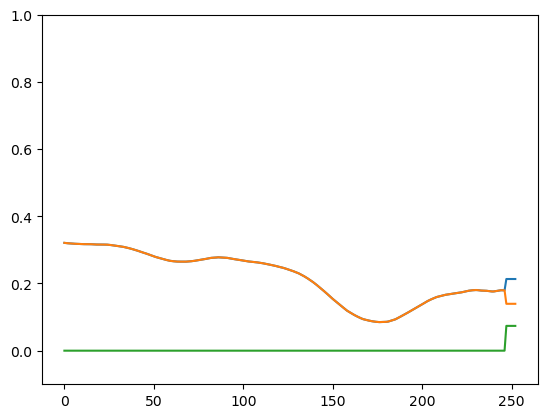

In [7]:
vv = bc1.variables['zeta_south'][:]
v2 = ic1.variables['zeta'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,:])
p1=ax.plot(v2[0,0,:])
p3=ax.plot(vv[0,:]-v2[0,0,:])
ax.set_ylim([-.1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 253)


(-0.1, 1.0)

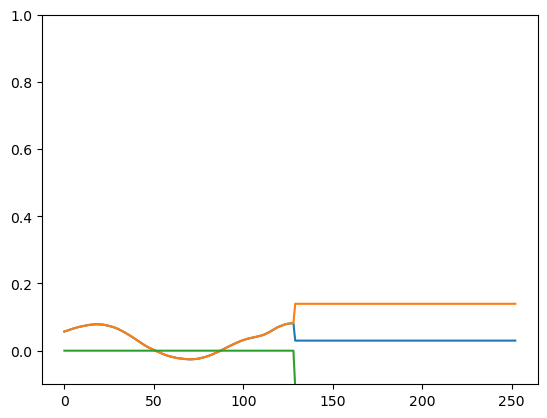

In [8]:
vv = bc1.variables['zeta_north'][:]
v2 = ic1.variables['zeta'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,:])
p1=ax.plot(v2[0,-1,:])
p3=ax.plot(vv[0,:]-v2[0,-1,:])
ax.set_ylim([-.1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 390)


(-0.1, 1.0)

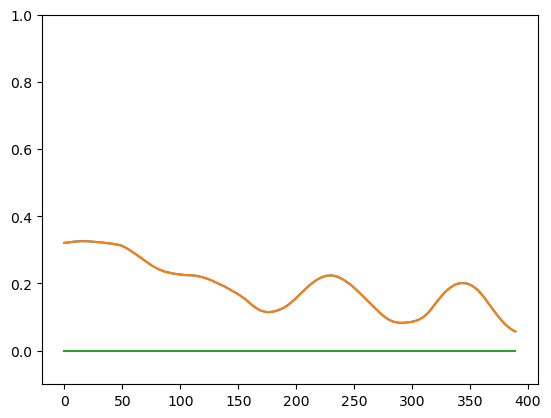

In [9]:
vv = bc1.variables['zeta_west'][:]
v2 = ic1.variables['zeta'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,:])
p1=ax.plot(v2[0,:,0])
p3=ax.plot(vv[0,:]-v2[0,:,0])
ax.set_ylim([-.1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 252)


(-0.1, 1.0)

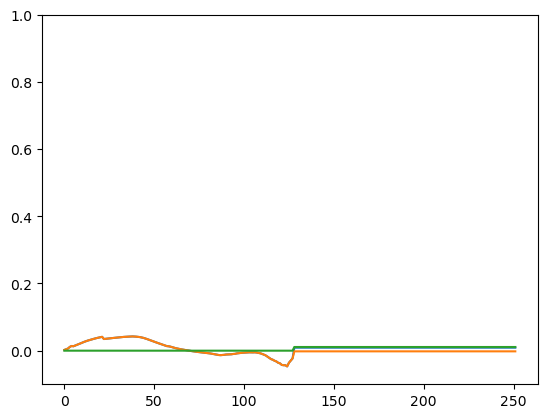

In [10]:
vv = bc1.variables['ubar_north'][:]
v2 = ic1.variables['ubar'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,:])
p1=ax.plot(v2[0,-1,:])
p3=ax.plot(vv[0,:]-v2[0,-1,:])
ax.set_ylim([-.1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 252)


(-0.1, 1.0)

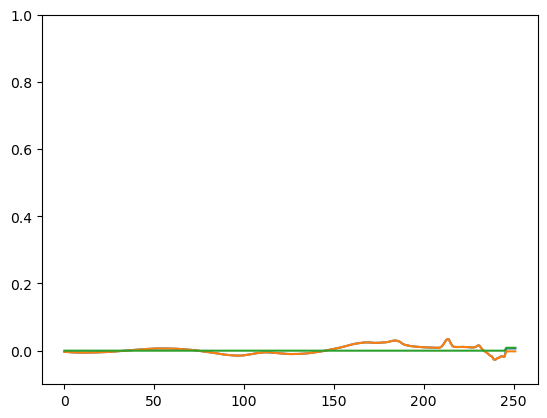

In [11]:
vv = bc1.variables['ubar_south'][:]
v2 = ic1.variables['ubar'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,:])
p1=ax.plot(v2[0,0,:])
p3=ax.plot(vv[0,:]-v2[0,0,:])
ax.set_ylim([-.1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 390)


(-0.1, 1.0)

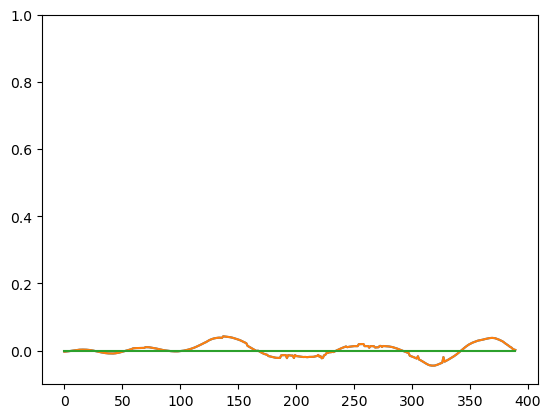

In [12]:
vv = bc1.variables['ubar_west'][:]
v2 = ic1.variables['ubar'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,:])
p1=ax.plot(v2[0,:,0])
p3=ax.plot(vv[0,:]-v2[0,:,0])
ax.set_ylim([-.1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 40, 390)


(-0.1, 30.0)

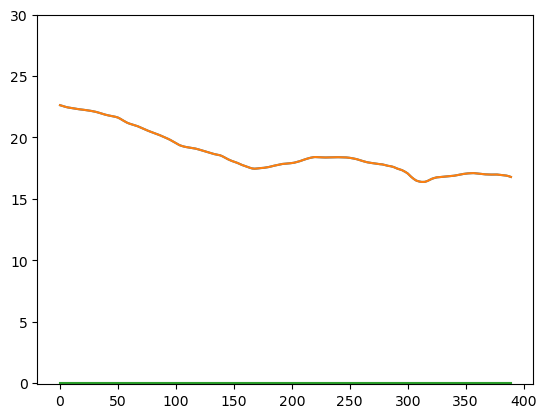

In [13]:
vv = bc1.variables['temp_west'][:]
v2 = ic1.variables['temp'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,-1,:])
p1=ax.plot(v2[0,-1,:,0])
p3=ax.plot(vv[0,-1,:]-v2[0,-1,:,0])
ax.set_ylim([-.1, 30])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 40, 390)


(-0.1, 35.0)

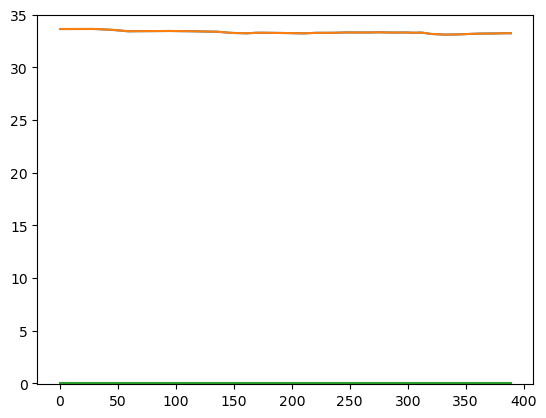

In [14]:
vv = bc1.variables['salt_west'][:]
v2 = ic1.variables['salt'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,-1,:])
p1=ax.plot(v2[0,-1,:,0])
p3=ax.plot(vv[0,-1,:]-v2[0,-1,:,0])
ax.set_ylim([-.1, 35])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 40, 389)


(-1.0, 1.0)

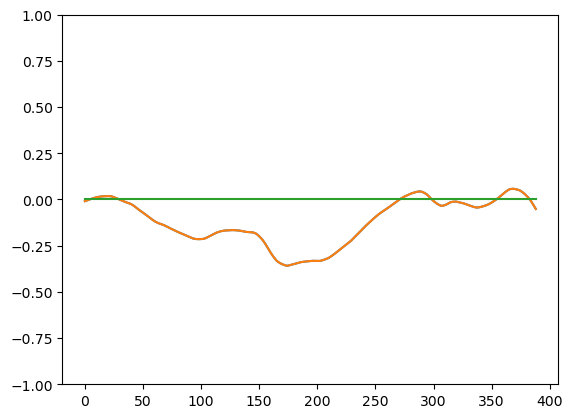

In [15]:
vv = bc1.variables['v_west'][:]
v2 = ic1.variables['v'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,-1,:])
p1=ax.plot(v2[0,-1,:,0])
p3=ax.plot(vv[0,-1,:]-v2[0,-1,:,0])
ax.set_ylim([-1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 40, 390)


(-1.0, 1.0)

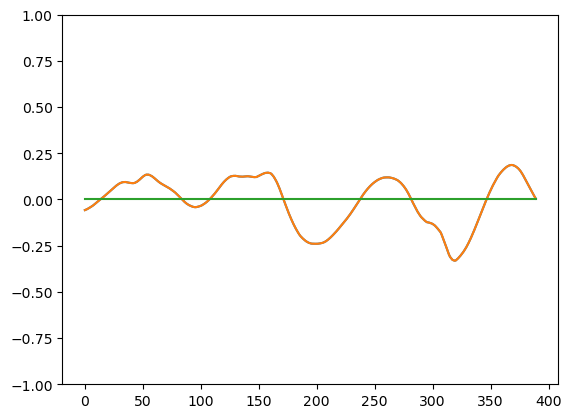

In [16]:
vv = bc1.variables['u_west'][:]
v2 = ic1.variables['u'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,-1,:])
p1=ax.plot(v2[0,-1,:,0])
p3=ax.plot(vv[0,-1,:]-v2[0,-1,:,0])
ax.set_ylim([-1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')



(21, 40, 390)


(-1.0, 1.0)

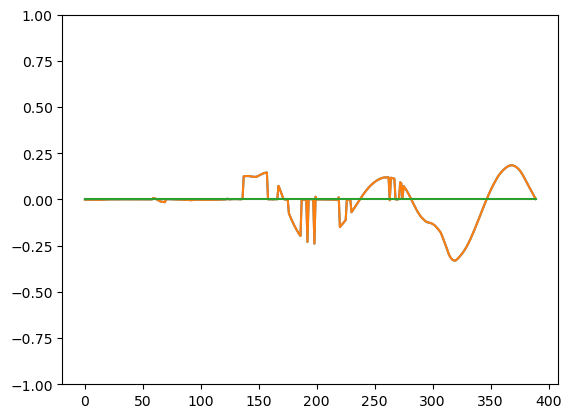

In [17]:
vv = bc1.variables['u_west'][:]
v2 = ic1.variables['u'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,0,:])
p1=ax.plot(v2[0,0,:,0])
p3=ax.plot(vv[0,0,:]-v2[0,0,:,0])
ax.set_ylim([-1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 40, 252)


(120.0, 130.0)

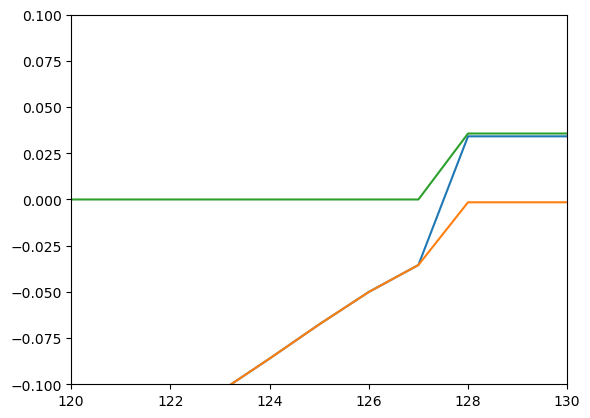

In [18]:
vv = bc1.variables['u_north'][:]
v2 = ic1.variables['u'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,-1,:])
p1=ax.plot(v2[0,-1,-1,:])
p3=ax.plot(vv[0,-1,:]-v2[0,-1,-1,:])
ax.set_ylim([-.1, .1])
ax.set_xlim([120,130])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 40, 253)


(-1.0, 1.0)

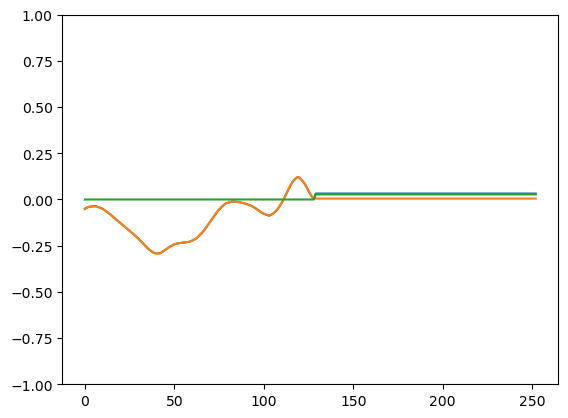

In [19]:
vv = bc1.variables['v_north'][:]
v2 = ic1.variables['v'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,-1,:])
p1=ax.plot(v2[0,-1,-1,:])
p3=ax.plot(vv[0,-1,:]-v2[0,-1,-1,:])
ax.set_ylim([-1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 40, 253)


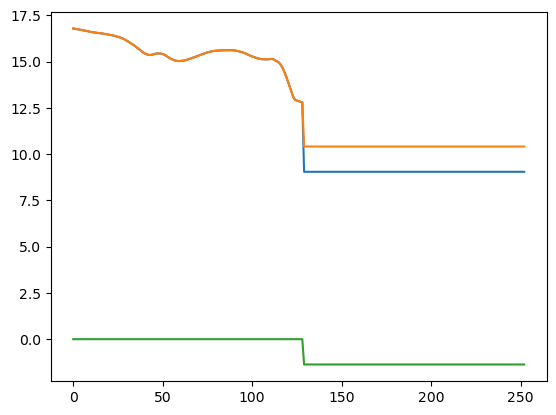

In [20]:
vv = bc1.variables['temp_north'][:]
v2 = ic1.variables['temp'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,-1,:])
p1=ax.plot(v2[0,-1,-1,:])
p3=ax.plot(vv[0,-1,:]-v2[0,-1,-1,:])
#ax.set_ylim([-1, 1])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


(21, 40, 253)


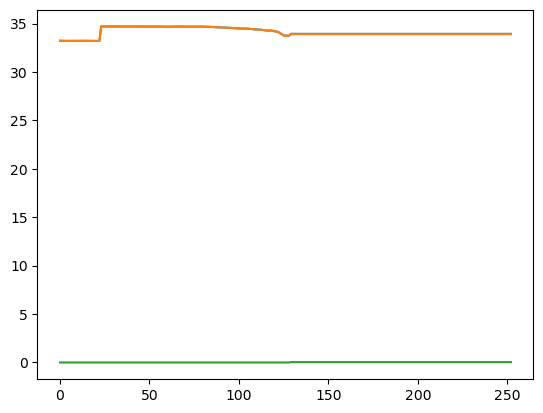

In [21]:
vv = bc1.variables['salt_north'][:]
v2 = ic1.variables['salt'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,0,:])
p1=ax.plot(v2[0,0,-1,:])
p3=ax.plot(vv[0,0,:]-v2[0,0,-1,:])
#ax.set_ylim([33, 34])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')


In [ ]:
vv = bc1.variables['salt_north'][:]
v2 = ic1.variables['salt'][:]
print(np.shape(vv))
fig, ax = plt.subplots()
#p0=ax[0].imshow(vv[:,:], interpolation='none',origin='lower')
#fig.colorbar(p0, ax=ax[0],location='bottom')
p0=ax.plot(vv[0,-1,:])
p1=ax.plot(v2[0,-1,-1,:])
p3=ax.plot(vv[0,-1,:]-v2[0,-1,-1,:])
ax.set_ylim([33, 34])
#p1=ax[1].imshow(v2[0,:,:], interpolation='none',origin='lower')
#fig.colorbar(p1, ax=ax[1],location='bottom')



In [ ]:

# this block of code shows that there are only NaNs on land
# for the boundary conditions file

vns = ['zeta','ubar','vbar','salt','temp','u','v']
grs = ['mask_rho','mask_u','mask_v','mask_rho','mask_rho','mask_u','mask_v']
eds = ['_north','_south','_west']
nzs = [1,1,1,40,40,40,40]
nt = 21
for aa in range(7):
    nz = nzs[aa]
    nn = nz*nt
    for bb in eds:
        mk = grd.variables[grs[aa]][:]
        vv = bc1.variables[vns[aa]+bb][:]
        #print(vns[aa] + bb)
        #print(np.shape(vv))
        if bb=='_north':
            mk=mk[-1,:]
        elif bb=='_south':
            mk=mk[0,:]
        elif bb=='_west':
            mk=mk[:,0]

        num_nan_0 = nn*np.sum( 1-mk )
        num_nan = np.count_nonzero( np.isnan( vv ))
        print('there should be ' + str(num_nan_0) + ' NaNs in ' + vns[aa]+bb)
        print('there are: ' + str(num_nan) +' NaNs\n')


In [25]:
# this block of code shows that there are only NaNs on land
# for the IC fields

vns = ['zeta','ubar','vbar','salt','temp','u','v']
grs = ['mask_rho','mask_u','mask_v','mask_rho','mask_rho','mask_u','mask_v']
nzs = [1,1,1,40,40,40,40]

cnt = 0
for aa in range(7):
    vv = ic1.variables[vns[aa]][:]
    mk = grd.variables[grs[aa]][:]
    nz = nzs[aa]
    if nz==40:
        vv2 = vv[0,:,:,:]
    else:
        vv2 = vv[0,:,:]
    num_nan_0 = nz*np.sum( 1-mk )
    num_nan = np.count_nonzero( np.isnan( vv2 ))
    print('there should be ' + str(num_nan_0) + ' NaNs in ' + vns[aa])
    print('there are: ' + str(num_nan) +' NaNs\n')


there should be 17453.0 NaNs in zeta
there are: 17453 NaNs

there should be 17538.0 NaNs in ubar
there are: 17538 NaNs

there should be 17593.0 NaNs in vbar
there are: 17593 NaNs

there should be 698120.0 NaNs in salt
there are: 698120 NaNs

there should be 698120.0 NaNs in temp
there are: 698120 NaNs

there should be 701520.0 NaNs in u
there are: 701520 NaNs

there should be 703720.0 NaNs in v
there are: 703720 NaNs



10.408486998054535
10.408486998054535
3946800
3946800
0.0


TypeError: Invalid shape (40, 390, 253) for image data

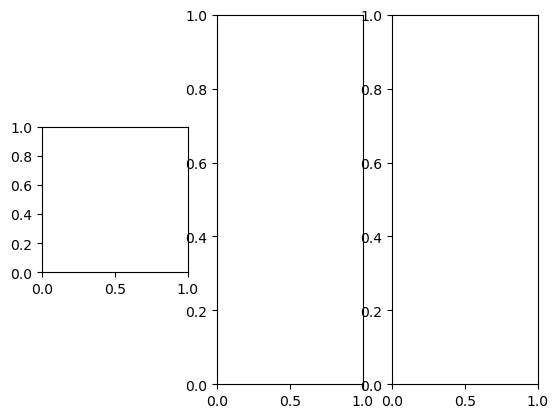

In [37]:


zeta = ic1.variables['temp'][:]
#print(grd.variables.keys())
mask_rho = grd.variables['mask_rho']



print(np.nanmean(zeta))
print(zeta.mean())

zeta2 = zeta.copy()
zeta2 = zeta2.filled(zeta2.mean())
inz = np.isnan(zeta)

print(np.count_nonzero(zeta))
print(np.count_nonzero(zeta2))

zg = np.ones(np.shape(zeta))
zg[inz] = 0

dn = zg[0,:,:] - mask_rho

print(np.sum(dn))

fig, ax = plt.subplots(nrows=1, ncols=3)
p0=ax[0].imshow(zg[0,:,:], interpolation='none',origin='lower')
p1=ax[1].imshow(mask_rho, interpolation='none',origin='lower')
p2=ax[2].imshow(dn, interpolation='none',origin='lower')
fig.colorbar(p0, ax=ax[0],location='bottom')
fig.colorbar(p1, ax=ax[1],location='bottom')
fig.colorbar(p2, ax=ax[2],location='bottom')
p0.set_clim(0,1)
p1.set_clim(0,1)
p2.set_clim(-.01,.01)

fig, ax = plt.subplots(nrows=1, ncols=2)
p0=ax[0].imshow(zeta[0,:,:], interpolation='none',origin='lower')
p1=ax[1].imshow(zeta2[0,:,:], interpolation='none',origin='lower')
fig.colorbar(p0, ax=ax[0],location='bottom')
fig.colorbar(p1, ax=ax[1],location='bottom')
#p0.set_clim(0,1)
#p1.set_clim(0,1)



In [ ]:


tic1 = ic1.variables['ocean_time']
tic2 = ic2.variables['ocean_time']

print(ic1.variables.keys())
print(ic2.variables.keys())

u1 = ic1.variables['u']
u2 = ic2.variables['u']
v1 = ic1.variables['v']
v2 = ic2.variables['v']
temp1 = ic1.variables['temp']
temp2 = ic2.variables['temp']
s1 = ic1.variables['salt']
s2 = ic2.variables['salt']
e1 = ic1.variables['zeta']
e2 = ic2.variables['zeta']

u10=u1[:]
u20=u2[:]
v10=v1[:]
v20=v2[:]
t10=temp1[:]
t20=temp2[:]
s10=s1[:]
s20=s2[:]
e10=e1[:]
e20=e2[:]

print(np.shape(u10))
print(np.shape(u20))

u1s = np.squeeze(u10[0,39,:,:])
u2s = np.squeeze(u20[0,0,39,:,:])
v1s = np.squeeze(v10[0,39,:,:])
v2s = np.squeeze(v20[0,0,39,:,:])
t1s = np.squeeze(t10[0,39,:,:])
t2s = np.squeeze(t20[0,0,39,:,:])
s1s = np.squeeze(s10[0,39,:,:])
s2s = np.squeeze(s20[0,0,39,:,:])
e1s = np.squeeze(e10[0,:,:])
e2s = np.squeeze(e20[0,0,:,:])

print(np.shape(e1s))
print(np.shape(e2s))

print(np.count_nonzero(np.isnan(u1s)))
print(np.count_nonzero(np.isnan(u2s)))
print(np.count_nonzero(np.isnan(v1s)))
print(np.count_nonzero(np.isnan(v2s)))
print(np.count_nonzero(np.isnan(t1s)))
print(np.count_nonzero(np.isnan(t2s)))
print(np.count_nonzero(np.isnan(s1s)))
print(np.count_nonzero(np.isnan(s2s)))
print(np.count_nonzero(np.isnan(e1s)))
print(np.count_nonzero(np.isnan(e2s)))


print(np.nanmean(u1s))
print(np.nanmean(u2s))
print(np.nanmean(v1s))
print(np.nanmean(v2s))

print(u1s[0,-2:])
print(u2s[0,-2:])

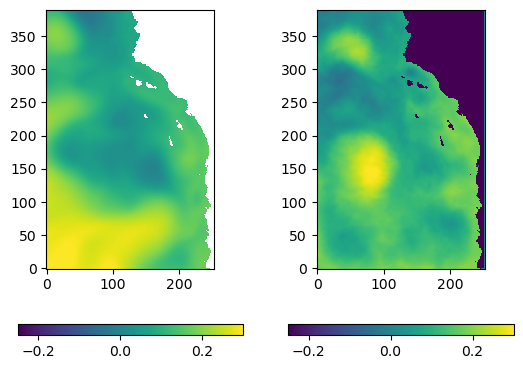

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=2)

p0=ax[0].imshow(e1s, interpolation='none',origin='lower')
p1=ax[1].imshow(e2s, interpolation='none',origin='lower')
fig.colorbar(p0, ax=ax[0],location='bottom')
fig.colorbar(p1, ax=ax[1],location='bottom')
p0.set_clim(-.25,.3)
p1.set_clim(-.25,.3)

In [63]:
a1 = netCDF4.Dataset('/scratch/PFM_Simulations/LV1_Forecast/Forc/LV1_ATM_FORCING.nc')
a2 = netCDF4.Dataset('/scratch/matt/sdtjre_L1/roms_nam_LV1_20181216_20190115.nc')
#print(a1.variables.keys())
#print(a2.variables.keys())
tf1 = a1.variables['ocean_time']
tf2 = a2.variables['ocean_time']

tt1 = netCDF4.num2date(tf1[:],tf1.units)
tt2 = netCDF4.num2date(tf2[:],tf2.units)
print(tt1)
print(tt2)



ValueError: Unable to parse date string 'tref'

: 

In [54]:
fetch_time = datetime.now(timezone.utc) 
print(fetch_time)


2024-09-16 23:54:03.503718+00:00


In [ ]:

from concurrent.futures import ThreadPoolExecutor

# protect the entry point
# create a thread pool with many workers
with ThreadPoolExecutor() as exe:
    # report the number of workers in the pool
    print(exe._max_workers)
    

In [42]:
from time import sleep
from concurrent.futures import ThreadPoolExecutor

# task function to be executed in the thread pool
def task(value):
    # sleep for a moment
    sleep(1)
    # return a message
    return f'Task: {value} done.'

# protect the entry point
# start the thread pool
with ThreadPoolExecutor(5) as exe:
    # execute tasks concurrently and process results in order
    for result in exe.map(task, range(10)):
        # report the result
        print(result)
        

Task: 0 done.
Task: 1 done.
Task: 2 done.
Task: 3 done.
Task: 4 done.
Task: 5 done.
Task: 6 done.
Task: 7 done.
Task: 8 done.
Task: 9 done.


In [43]:
from time import sleep
from concurrent.futures import ThreadPoolExecutor

# task function to be executed in the thread pool
def task():
    # report a message
    print(f'Task executing')
    # block for a moment
    sleep(1)
    # return a result
    return 'All Done'

# protect the entry point
# create and configure the thread pool
with ThreadPoolExecutor() as exe:
    # issue tasks to the thread pool
    future = exe.submit(task)
    # wait for the result
    print('Waiting for result...')
    result = future.result()
    # report the result
    print(result)
    

Task executing
Waiting for result...
All Done


In [51]:
from time import sleep
from concurrent.futures import ThreadPoolExecutor
from concurrent.futures import wait

# task function to be executed in the thread pool
def task(value):
    # sleep for a moment
    #sleep(0.5)
    # report a message
    print(f'Done: {value}')
    dum = value+1
    return dum

# start the thread pool
nn = 100
dum2 = np.zeros((nn,1))

with ThreadPoolExecutor() as exe:
    # submit tasks and collect futures
    for i in range(nn):
        futures = exe.submit(task, i)
        # wait for all tasks to complete
        dum2[i] = futures.result()
        #print('Waiting for tasks to complete...')

print(dum2)

Done: 0
Done: 1
Done: 2
Done: 3
Done: 4
Done: 5
Done: 6
Done: 7
Done: 8
Done: 9
Done: 10
Done: 11
Done: 12
Done: 13
Done: 14
Done: 15
Done: 16
Done: 17
Done: 18
Done: 19
Done: 20
Done: 21
Done: 22
Done: 23
Done: 24
Done: 25
Done: 26
Done: 27
Done: 28
Done: 29
Done: 30
Done: 31
Done: 32
Done: 33
Done: 34
Done: 35
Done: 36
Done: 37
Done: 38
Done: 39
Done: 40
Done: 41
Done: 42
Done: 43
Done: 44
Done: 45
Done: 46
Done: 47
Done: 48
Done: 49
Done: 50
Done: 51
Done: 52
Done: 53
Done: 54
Done: 55
Done: 56
Done: 57
Done: 58
Done: 59
Done: 60
Done: 61
Done: 62
Done: 63
Done: 64
Done: 65
Done: 66
Done: 67
Done: 68
Done: 69
Done: 70
Done: 71
Done: 72
Done: 73
Done: 74
Done: 75
Done: 76
Done: 77
Done: 78
Done: 79
Done: 80
Done: 81
Done: 82
Done: 83
Done: 84
Done: 85
Done: 86
Done: 87
Done: 88
Done: 89
Done: 90
Done: 91
Done: 92
Done: 93
Done: 94
Done: 95
Done: 96
Done: 97
Done: 98
Done: 99
[[  1.]
 [  2.]
 [  3.]
 [  4.]
 [  5.]
 [  6.]
 [  7.]
 [  8.]
 [  9.]
 [ 10.]
 [ 11.]
 [ 12.]
 [ 13.]
 [ 14.